In [22]:
%matplotlib inline

import mxnet as mx
import numpy as np
import pandas as pd
from mxnet import nd, autograd, gluon

import matplotlib.pyplot as plt

In [23]:
data_ctx = mx.cpu()

### Process Data

In [24]:
data = pd.read_csv('processed_Iris.csv')

In [25]:
data_iter = mx.io.CSVIter(data_csv='processed_Iris.csv',
                          data_shape=(5,),
                          batch_size=150,
                          round_batch = False)

X=[]
Y=[]
for batch in data_iter:

    temp = batch.data[0]
    for i in temp:
        X.append(i[:4])
        Y.append(i[4])

### Load Training Data

In [26]:
# train_data = mx.gluon.data.DataLoader(mx.gluon.data.vision.MNIST(train=True
#                                                                  , transform=transform),
#                                       batch_size, shuffle=True)

# test_data = mx.gluon.data.DataLoader(mx.gluon.data.vision.MNIST(train=False
#                                                                 , transform=transform),
#                                      batch_size, shuffle=False)

# Practice using Iris Dataset

batch_size = 30
train_data = gluon.data.DataLoader(gluon.data.ArrayDataset(X, Y),
                                        batch_size=batch_size,
                                        shuffle=True)

### Softmax CrossEntropy Loss

In [27]:
softmax_cross_entropy = gluon.loss.SoftmaxCrossEntropyLoss()

### Evaluation Metric

In [28]:
def evaluate_accuracy(data_iterator, net):
    acc = mx.metric.Accuracy()
    for i, (data, label) in enumerate(data_iterator):
        data = data.as_in_context(data_ctx)
        label = label.as_in_context(data_ctx)
        output = net(data)
        predictions = nd.argmax(output, axis=1)
        acc.update(preds=predictions, labels=label)
    return acc.get()[1]

### Create Net

In [33]:
def build_net(num_hidden,num_outputs, hidden_width, dropout_prob):
    net = gluon.nn.Sequential()
    with net.name_scope():

        for i in xrange(num_hidden):
            ###########################
            # Adding hidden layer
            ###########################
            
            net.add(gluon.nn.Dense(hidden_width, activation=None))
            net.add(gluon.nn.LeakyReLU(alpha = 0.01))
            
            ###########################
            # Adding dropout with rate dropout_prob
            ###########################
            net.add(gluon.nn.Dropout(dropout_prob))

        ###########################
        # Adding the output layer
        ###########################
        net.add(gluon.nn.Dense(num_outputs))

    return net

### Execute Training

Epoch 0. Loss: 1.1773582, Train_acc 0.333333333333
Epoch 1. Loss: 1.1725872, Train_acc 0.226666666667
Epoch 2. Loss: 1.1978955, Train_acc 0.333333333333
Epoch 3. Loss: 1.1247611, Train_acc 0.313333333333
Epoch 4. Loss: 1.1194316, Train_acc 0.333333333333
Epoch 5. Loss: 1.1376005, Train_acc 0.333333333333
Epoch 6. Loss: 1.0724467, Train_acc 0.333333333333
Epoch 7. Loss: 1.0282449, Train_acc 0.333333333333
Epoch 8. Loss: 1.0765014, Train_acc 0.366666666667
Epoch 9. Loss: 1.0052569, Train_acc 0.593333333333
Epoch 10. Loss: 0.99180675, Train_acc 0.666666666667
Epoch 11. Loss: 0.9097599, Train_acc 0.713333333333
Epoch 12. Loss: 0.9268762, Train_acc 0.733333333333
Epoch 13. Loss: 0.90971684, Train_acc 0.713333333333
Epoch 14. Loss: 0.9288016, Train_acc 0.7
Epoch 15. Loss: 0.85001653, Train_acc 0.693333333333
Epoch 16. Loss: 0.83477426, Train_acc 0.7
Epoch 17. Loss: 0.7424495, Train_acc 0.72
Epoch 18. Loss: 0.8053065, Train_acc 0.726666666667
Epoch 19. Loss: 0.84201545, Train_acc 0.7066666666

Epoch 166. Loss: 0.090491705, Train_acc 0.986666666667
Epoch 167. Loss: 0.29795212, Train_acc 0.986666666667
Epoch 168. Loss: 0.08278417, Train_acc 0.973333333333
Epoch 169. Loss: 0.07831672, Train_acc 0.973333333333
Epoch 170. Loss: 0.3695426, Train_acc 0.973333333333
Epoch 171. Loss: 0.13621952, Train_acc 0.98
Epoch 172. Loss: 0.15312137, Train_acc 0.973333333333
Epoch 173. Loss: 0.1511574, Train_acc 0.98
Epoch 174. Loss: 0.23823594, Train_acc 0.973333333333
Epoch 175. Loss: 0.2939585, Train_acc 0.98
Epoch 176. Loss: 0.35300288, Train_acc 0.98
Epoch 177. Loss: 0.2775084, Train_acc 0.98
Epoch 178. Loss: 0.26796234, Train_acc 0.98
Epoch 179. Loss: 0.27607453, Train_acc 0.986666666667
Epoch 180. Loss: 0.13497826, Train_acc 0.98
Epoch 181. Loss: 0.21586388, Train_acc 0.986666666667
Epoch 182. Loss: 0.19283034, Train_acc 0.986666666667
Epoch 183. Loss: 0.14231993, Train_acc 0.986666666667
Epoch 184. Loss: 0.27134976, Train_acc 0.986666666667
Epoch 185. Loss: 0.11674611, Train_acc 0.986666

Epoch 339. Loss: 0.058404926, Train_acc 0.98
Epoch 340. Loss: 0.228577, Train_acc 0.98
Epoch 341. Loss: 0.074438974, Train_acc 0.986666666667
Epoch 342. Loss: 0.26414427, Train_acc 0.98
Epoch 343. Loss: 0.07956337, Train_acc 0.98
Epoch 344. Loss: 0.056940746, Train_acc 0.986666666667
Epoch 345. Loss: 0.07636752, Train_acc 0.98
Epoch 346. Loss: 0.082885735, Train_acc 0.986666666667
Epoch 347. Loss: 0.21382697, Train_acc 0.98
Epoch 348. Loss: 0.057667572, Train_acc 0.98
Epoch 349. Loss: 0.1374002, Train_acc 0.98
Epoch 350. Loss: 0.042924546, Train_acc 0.986666666667
Epoch 351. Loss: 0.25121015, Train_acc 0.986666666667
Epoch 352. Loss: 0.23781745, Train_acc 0.98
Epoch 353. Loss: 0.2548141, Train_acc 0.986666666667
Epoch 354. Loss: 0.12534577, Train_acc 0.986666666667
Epoch 355. Loss: 0.054230187, Train_acc 0.98
Epoch 356. Loss: 0.07178511, Train_acc 0.986666666667
Epoch 357. Loss: 0.3593582, Train_acc 0.98
Epoch 358. Loss: 0.17665628, Train_acc 0.98
Epoch 359. Loss: 0.2954697, Train_acc 

Epoch 517. Loss: 0.1330956, Train_acc 0.98
Epoch 518. Loss: 0.11368265, Train_acc 0.98
Epoch 519. Loss: 0.13448018, Train_acc 0.98
Epoch 520. Loss: 0.18547782, Train_acc 0.98
Epoch 521. Loss: 0.032250416, Train_acc 0.98
Epoch 522. Loss: 0.13583967, Train_acc 0.98
Epoch 523. Loss: 0.065627106, Train_acc 0.986666666667
Epoch 524. Loss: 0.10820565, Train_acc 0.986666666667
Epoch 525. Loss: 0.07073216, Train_acc 0.98
Epoch 526. Loss: 0.21017905, Train_acc 0.98
Epoch 527. Loss: 0.027330553, Train_acc 0.986666666667
Epoch 528. Loss: 0.19724779, Train_acc 0.98
Epoch 529. Loss: 0.14203863, Train_acc 0.986666666667
Epoch 530. Loss: 0.024602741, Train_acc 0.98
Epoch 531. Loss: 0.15657523, Train_acc 0.98
Epoch 532. Loss: 0.17873305, Train_acc 0.98
Epoch 533. Loss: 0.039374538, Train_acc 0.98
Epoch 534. Loss: 0.098889574, Train_acc 0.98
Epoch 535. Loss: 0.19667354, Train_acc 0.98
Epoch 536. Loss: 0.102992035, Train_acc 0.986666666667
Epoch 537. Loss: 0.056817736, Train_acc 0.98
Epoch 538. Loss: 0.

Epoch 693. Loss: 0.012664506, Train_acc 0.98
Epoch 694. Loss: 0.12040973, Train_acc 0.986666666667
Epoch 695. Loss: 0.24030098, Train_acc 0.98
Epoch 696. Loss: 0.19103621, Train_acc 0.98
Epoch 697. Loss: 0.056104805, Train_acc 0.986666666667
Epoch 698. Loss: 0.067907706, Train_acc 0.986666666667
Epoch 699. Loss: 0.054944053, Train_acc 0.98


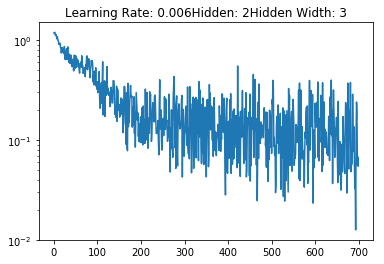

Epoch 0. Loss: 1.1576402, Train_acc 0.333333333333
Epoch 1. Loss: 1.1484443, Train_acc 0.333333333333
Epoch 2. Loss: 1.1005026, Train_acc 0.333333333333
Epoch 3. Loss: 1.1154609, Train_acc 0.333333333333
Epoch 4. Loss: 1.0540756, Train_acc 0.413333333333
Epoch 5. Loss: 1.0559332, Train_acc 0.46
Epoch 6. Loss: 1.0599809, Train_acc 0.466666666667
Epoch 7. Loss: 1.0367893, Train_acc 0.54
Epoch 8. Loss: 1.0589236, Train_acc 0.446666666667
Epoch 9. Loss: 1.0519805, Train_acc 0.393333333333
Epoch 10. Loss: 1.0345093, Train_acc 0.36
Epoch 11. Loss: 1.0859661, Train_acc 0.333333333333
Epoch 12. Loss: 1.0370121, Train_acc 0.333333333333
Epoch 13. Loss: 1.033902, Train_acc 0.333333333333
Epoch 14. Loss: 1.0029863, Train_acc 0.333333333333
Epoch 15. Loss: 1.0178033, Train_acc 0.346666666667
Epoch 16. Loss: 1.049079, Train_acc 0.353333333333
Epoch 17. Loss: 0.98892313, Train_acc 0.44
Epoch 18. Loss: 0.89978987, Train_acc 0.62
Epoch 19. Loss: 0.94888085, Train_acc 0.66
Epoch 20. Loss: 0.92013067, T

Epoch 174. Loss: 0.19674039, Train_acc 0.973333333333
Epoch 175. Loss: 0.2035523, Train_acc 0.98
Epoch 176. Loss: 0.07934503, Train_acc 0.986666666667
Epoch 177. Loss: 0.23127285, Train_acc 0.986666666667
Epoch 178. Loss: 0.20379104, Train_acc 0.986666666667
Epoch 179. Loss: 0.24923539, Train_acc 0.98
Epoch 180. Loss: 0.1772894, Train_acc 0.973333333333
Epoch 181. Loss: 0.0931083, Train_acc 0.986666666667
Epoch 182. Loss: 0.17432444, Train_acc 0.986666666667
Epoch 183. Loss: 0.12403125, Train_acc 0.986666666667
Epoch 184. Loss: 0.19042654, Train_acc 0.986666666667
Epoch 185. Loss: 0.15432556, Train_acc 0.98
Epoch 186. Loss: 0.26466113, Train_acc 0.98
Epoch 187. Loss: 0.060683552, Train_acc 0.986666666667
Epoch 188. Loss: 0.19005278, Train_acc 0.986666666667
Epoch 189. Loss: 0.20449708, Train_acc 0.986666666667
Epoch 190. Loss: 0.10494869, Train_acc 0.986666666667
Epoch 191. Loss: 0.13320072, Train_acc 0.986666666667
Epoch 192. Loss: 0.13376619, Train_acc 0.986666666667
Epoch 193. Loss:

Epoch 343. Loss: 0.27291185, Train_acc 0.986666666667
Epoch 344. Loss: 0.061405107, Train_acc 0.98
Epoch 345. Loss: 0.1365386, Train_acc 0.973333333333
Epoch 346. Loss: 0.15255977, Train_acc 0.986666666667
Epoch 347. Loss: 0.08604219, Train_acc 0.986666666667
Epoch 348. Loss: 0.06551825, Train_acc 0.986666666667
Epoch 349. Loss: 0.10492412, Train_acc 0.98
Epoch 350. Loss: 0.06739815, Train_acc 0.973333333333
Epoch 351. Loss: 0.088925935, Train_acc 0.98
Epoch 352. Loss: 0.03808909, Train_acc 0.986666666667
Epoch 353. Loss: 0.11960159, Train_acc 0.986666666667
Epoch 354. Loss: 0.056045327, Train_acc 0.986666666667
Epoch 355. Loss: 0.16129628, Train_acc 0.986666666667
Epoch 356. Loss: 0.2888554, Train_acc 0.98
Epoch 357. Loss: 0.12497272, Train_acc 0.98
Epoch 358. Loss: 0.19078074, Train_acc 0.98
Epoch 359. Loss: 0.15108371, Train_acc 0.973333333333
Epoch 360. Loss: 0.14052339, Train_acc 0.98
Epoch 361. Loss: 0.3853091, Train_acc 0.986666666667
Epoch 362. Loss: 0.04277673, Train_acc 0.986

Epoch 509. Loss: 0.036120523, Train_acc 0.98
Epoch 510. Loss: 0.24499542, Train_acc 0.986666666667
Epoch 511. Loss: 0.05615165, Train_acc 0.986666666667
Epoch 512. Loss: 0.1119885, Train_acc 0.986666666667
Epoch 513. Loss: 0.04968705, Train_acc 0.986666666667
Epoch 514. Loss: 0.17430905, Train_acc 0.98
Epoch 515. Loss: 0.09590435, Train_acc 0.98
Epoch 516. Loss: 0.071312234, Train_acc 0.986666666667
Epoch 517. Loss: 0.18519904, Train_acc 0.986666666667
Epoch 518. Loss: 0.047684137, Train_acc 0.973333333333
Epoch 519. Loss: 0.12346827, Train_acc 0.986666666667
Epoch 520. Loss: 0.1481686, Train_acc 0.973333333333
Epoch 521. Loss: 0.13818718, Train_acc 0.986666666667
Epoch 522. Loss: 0.007824918, Train_acc 0.986666666667
Epoch 523. Loss: 0.032029703, Train_acc 0.986666666667
Epoch 524. Loss: 0.031952776, Train_acc 0.986666666667
Epoch 525. Loss: 0.05270117, Train_acc 0.986666666667
Epoch 526. Loss: 0.07453238, Train_acc 0.98
Epoch 527. Loss: 0.2524279, Train_acc 0.973333333333
Epoch 528. 

Epoch 675. Loss: 0.049816195, Train_acc 0.98
Epoch 676. Loss: 0.15073451, Train_acc 0.98
Epoch 677. Loss: 0.01290018, Train_acc 0.986666666667
Epoch 678. Loss: 0.16475466, Train_acc 0.98
Epoch 679. Loss: 0.011529315, Train_acc 0.986666666667
Epoch 680. Loss: 0.20670144, Train_acc 0.986666666667
Epoch 681. Loss: 0.079790786, Train_acc 0.986666666667
Epoch 682. Loss: 0.042973414, Train_acc 0.98
Epoch 683. Loss: 0.017447433, Train_acc 0.98
Epoch 684. Loss: 0.08260403, Train_acc 0.986666666667
Epoch 685. Loss: 0.09441952, Train_acc 0.986666666667
Epoch 686. Loss: 0.3701105, Train_acc 0.986666666667
Epoch 687. Loss: 0.1607724, Train_acc 0.986666666667
Epoch 688. Loss: 0.022206737, Train_acc 0.986666666667
Epoch 689. Loss: 0.18949522, Train_acc 0.98
Epoch 690. Loss: 0.110067055, Train_acc 0.986666666667
Epoch 691. Loss: 0.20648165, Train_acc 0.986666666667
Epoch 692. Loss: 0.057952534, Train_acc 0.986666666667
Epoch 693. Loss: 0.20266822, Train_acc 0.98
Epoch 694. Loss: 0.02475014, Train_acc

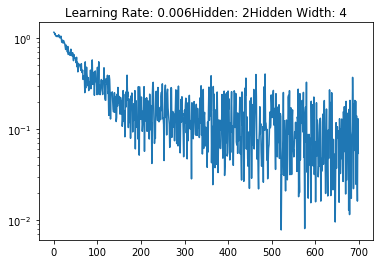

Epoch 0. Loss: 1.0724491, Train_acc 0.64
Epoch 1. Loss: 1.0946594, Train_acc 0.666666666667
Epoch 2. Loss: 1.0652258, Train_acc 0.46
Epoch 3. Loss: 1.0613128, Train_acc 0.64
Epoch 4. Loss: 1.0114084, Train_acc 0.64
Epoch 5. Loss: 0.9263608, Train_acc 0.553333333333
Epoch 6. Loss: 1.0110964, Train_acc 0.526666666667
Epoch 7. Loss: 0.94394803, Train_acc 0.646666666667
Epoch 8. Loss: 0.88372225, Train_acc 0.56
Epoch 9. Loss: 0.74330765, Train_acc 0.553333333333
Epoch 10. Loss: 0.8670575, Train_acc 0.493333333333
Epoch 11. Loss: 1.0017778, Train_acc 0.653333333333
Epoch 12. Loss: 0.82930446, Train_acc 0.666666666667
Epoch 13. Loss: 0.8721545, Train_acc 0.666666666667
Epoch 14. Loss: 0.80402684, Train_acc 0.68
Epoch 15. Loss: 0.78341323, Train_acc 0.68
Epoch 16. Loss: 0.7197236, Train_acc 0.666666666667
Epoch 17. Loss: 0.7516453, Train_acc 0.726666666667
Epoch 18. Loss: 0.76792985, Train_acc 0.673333333333
Epoch 19. Loss: 0.6394375, Train_acc 0.673333333333
Epoch 20. Loss: 0.5917383, Train_

Epoch 174. Loss: 0.27405512, Train_acc 0.98
Epoch 175. Loss: 0.15578811, Train_acc 0.986666666667
Epoch 176. Loss: 0.36766967, Train_acc 0.986666666667
Epoch 177. Loss: 0.41155994, Train_acc 0.973333333333
Epoch 178. Loss: 0.36024228, Train_acc 0.986666666667
Epoch 179. Loss: 0.27284563, Train_acc 0.986666666667
Epoch 180. Loss: 0.42427346, Train_acc 0.94
Epoch 181. Loss: 0.42531136, Train_acc 0.98
Epoch 182. Loss: 0.45908186, Train_acc 0.966666666667
Epoch 183. Loss: 0.347199, Train_acc 0.966666666667
Epoch 184. Loss: 0.3945308, Train_acc 0.973333333333
Epoch 185. Loss: 0.35257307, Train_acc 0.986666666667
Epoch 186. Loss: 0.34528494, Train_acc 0.986666666667
Epoch 187. Loss: 0.38852814, Train_acc 0.98
Epoch 188. Loss: 0.3673329, Train_acc 0.986666666667
Epoch 189. Loss: 0.25320077, Train_acc 0.98
Epoch 190. Loss: 0.70218295, Train_acc 0.973333333333
Epoch 191. Loss: 0.32906675, Train_acc 0.986666666667
Epoch 192. Loss: 0.24991532, Train_acc 0.966666666667
Epoch 193. Loss: 0.46382335,

Epoch 344. Loss: 0.20661117, Train_acc 0.986666666667
Epoch 345. Loss: 0.1880696, Train_acc 0.986666666667
Epoch 346. Loss: 0.2799033, Train_acc 0.973333333333
Epoch 347. Loss: 0.24575299, Train_acc 0.98
Epoch 348. Loss: 0.45353094, Train_acc 0.98
Epoch 349. Loss: 0.2302878, Train_acc 0.973333333333
Epoch 350. Loss: 0.2500082, Train_acc 0.96
Epoch 351. Loss: 0.19042584, Train_acc 0.94
Epoch 352. Loss: 0.32022873, Train_acc 0.966666666667
Epoch 353. Loss: 0.3904019, Train_acc 0.96
Epoch 354. Loss: 0.16583183, Train_acc 0.953333333333
Epoch 355. Loss: 0.16987926, Train_acc 0.96
Epoch 356. Loss: 0.18686134, Train_acc 0.986666666667
Epoch 357. Loss: 1.1170609, Train_acc 0.973333333333
Epoch 358. Loss: 0.32988855, Train_acc 0.96
Epoch 359. Loss: 0.33104056, Train_acc 0.98
Epoch 360. Loss: 0.2490442, Train_acc 0.98
Epoch 361. Loss: 0.14048432, Train_acc 0.98
Epoch 362. Loss: 0.22366148, Train_acc 0.96
Epoch 363. Loss: 0.37619165, Train_acc 0.926666666667
Epoch 364. Loss: 0.4619428, Train_acc

Epoch 516. Loss: 0.42274192, Train_acc 0.98
Epoch 517. Loss: 0.22922191, Train_acc 0.98
Epoch 518. Loss: 0.21464758, Train_acc 0.98
Epoch 519. Loss: 0.23268841, Train_acc 0.98
Epoch 520. Loss: 0.265136, Train_acc 0.98
Epoch 521. Loss: 0.18950109, Train_acc 0.986666666667
Epoch 522. Loss: 0.4713747, Train_acc 0.98
Epoch 523. Loss: 0.48958763, Train_acc 0.98
Epoch 524. Loss: 0.16276403, Train_acc 0.98
Epoch 525. Loss: 0.23583268, Train_acc 0.98
Epoch 526. Loss: 0.0899148, Train_acc 0.98
Epoch 527. Loss: 0.4920519, Train_acc 0.926666666667
Epoch 528. Loss: 0.24198689, Train_acc 0.926666666667
Epoch 529. Loss: 0.1933233, Train_acc 0.98
Epoch 530. Loss: 0.12673984, Train_acc 0.98
Epoch 531. Loss: 0.22627375, Train_acc 0.98
Epoch 532. Loss: 0.22280242, Train_acc 0.98
Epoch 533. Loss: 0.4728393, Train_acc 0.98
Epoch 534. Loss: 0.14482613, Train_acc 0.94
Epoch 535. Loss: 0.42299077, Train_acc 0.933333333333
Epoch 536. Loss: 0.2408469, Train_acc 0.98
Epoch 537. Loss: 0.23240969, Train_acc 0.96


Epoch 690. Loss: 0.092585556, Train_acc 0.98
Epoch 691. Loss: 0.34091982, Train_acc 0.98
Epoch 692. Loss: 0.22477399, Train_acc 0.98
Epoch 693. Loss: 0.24045435, Train_acc 0.973333333333
Epoch 694. Loss: 0.16381186, Train_acc 0.98
Epoch 695. Loss: 0.37873253, Train_acc 0.98
Epoch 696. Loss: 0.12290548, Train_acc 0.973333333333
Epoch 697. Loss: 0.17317179, Train_acc 0.946666666667
Epoch 698. Loss: 0.27414984, Train_acc 0.933333333333
Epoch 699. Loss: 0.36673704, Train_acc 0.98


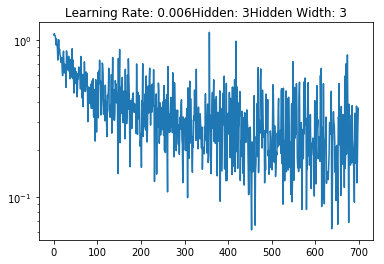

Epoch 0. Loss: 1.5393482, Train_acc 0.333333333333
Epoch 1. Loss: 1.1927948, Train_acc 0.333333333333
Epoch 2. Loss: 1.3007615, Train_acc 0.333333333333
Epoch 3. Loss: 1.1627406, Train_acc 0.333333333333
Epoch 4. Loss: 1.1102207, Train_acc 0.566666666667
Epoch 5. Loss: 1.127259, Train_acc 0.66
Epoch 6. Loss: 1.0647055, Train_acc 0.646666666667
Epoch 7. Loss: 1.0883027, Train_acc 0.58
Epoch 8. Loss: 1.0665919, Train_acc 0.34
Epoch 9. Loss: 1.0739484, Train_acc 0.52
Epoch 10. Loss: 1.0951002, Train_acc 0.52
Epoch 11. Loss: 1.0893425, Train_acc 0.526666666667
Epoch 12. Loss: 1.0827816, Train_acc 0.533333333333
Epoch 13. Loss: 1.0922458, Train_acc 0.526666666667
Epoch 14. Loss: 1.0928165, Train_acc 0.506666666667
Epoch 15. Loss: 1.0727005, Train_acc 0.493333333333
Epoch 16. Loss: 1.1000243, Train_acc 0.48
Epoch 17. Loss: 1.0520045, Train_acc 0.426666666667
Epoch 18. Loss: 1.0664728, Train_acc 0.433333333333
Epoch 19. Loss: 1.0486791, Train_acc 0.48
Epoch 20. Loss: 1.028453, Train_acc 0.5
E

Epoch 170. Loss: 0.19170092, Train_acc 0.986666666667
Epoch 171. Loss: 0.19971053, Train_acc 0.973333333333
Epoch 172. Loss: 0.45972246, Train_acc 0.966666666667
Epoch 173. Loss: 0.33421978, Train_acc 0.96
Epoch 174. Loss: 0.34789926, Train_acc 0.986666666667
Epoch 175. Loss: 0.12093233, Train_acc 0.973333333333
Epoch 176. Loss: 0.31409544, Train_acc 0.966666666667
Epoch 177. Loss: 0.3846427, Train_acc 0.966666666667
Epoch 178. Loss: 0.3495844, Train_acc 0.973333333333
Epoch 179. Loss: 0.16726373, Train_acc 0.98
Epoch 180. Loss: 0.19191527, Train_acc 0.973333333333
Epoch 181. Loss: 0.15455863, Train_acc 0.973333333333
Epoch 182. Loss: 0.20902456, Train_acc 0.986666666667
Epoch 183. Loss: 0.110738225, Train_acc 0.986666666667
Epoch 184. Loss: 0.12912981, Train_acc 0.986666666667
Epoch 185. Loss: 0.28040785, Train_acc 0.973333333333
Epoch 186. Loss: 0.23789078, Train_acc 0.98
Epoch 187. Loss: 0.0747172, Train_acc 0.986666666667
Epoch 188. Loss: 0.29375046, Train_acc 0.986666666667
Epoch 

Epoch 336. Loss: 0.16536742, Train_acc 0.98
Epoch 337. Loss: 0.14574014, Train_acc 0.986666666667
Epoch 338. Loss: 0.09800003, Train_acc 0.973333333333
Epoch 339. Loss: 0.29308322, Train_acc 0.98
Epoch 340. Loss: 0.05351082, Train_acc 0.973333333333
Epoch 341. Loss: 0.1527996, Train_acc 0.94
Epoch 342. Loss: 0.6012533, Train_acc 0.84
Epoch 343. Loss: 1.4254979, Train_acc 0.713333333333
Epoch 344. Loss: 0.506869, Train_acc 0.966666666667
Epoch 345. Loss: 0.40535495, Train_acc 0.92
Epoch 346. Loss: 0.40691578, Train_acc 0.873333333333
Epoch 347. Loss: 0.18299383, Train_acc 0.98
Epoch 348. Loss: 0.2825703, Train_acc 0.966666666667
Epoch 349. Loss: 0.3783944, Train_acc 0.94
Epoch 350. Loss: 0.1795525, Train_acc 0.96
Epoch 351. Loss: 0.14559647, Train_acc 0.966666666667
Epoch 352. Loss: 0.19073622, Train_acc 0.98
Epoch 353. Loss: 0.27134424, Train_acc 0.946666666667
Epoch 354. Loss: 0.11776009, Train_acc 0.946666666667
Epoch 355. Loss: 0.21783352, Train_acc 0.94
Epoch 356. Loss: 0.30828825,

Epoch 509. Loss: 0.06827701, Train_acc 0.973333333333
Epoch 510. Loss: 0.22907671, Train_acc 0.98
Epoch 511. Loss: 0.13718908, Train_acc 0.973333333333
Epoch 512. Loss: 0.10158728, Train_acc 0.973333333333
Epoch 513. Loss: 0.14059888, Train_acc 0.973333333333
Epoch 514. Loss: 0.10816498, Train_acc 0.973333333333
Epoch 515. Loss: 0.20609894, Train_acc 0.973333333333
Epoch 516. Loss: 0.339386, Train_acc 0.98
Epoch 517. Loss: 0.04631545, Train_acc 0.98
Epoch 518. Loss: 0.24623014, Train_acc 0.973333333333
Epoch 519. Loss: 0.12138998, Train_acc 0.973333333333
Epoch 520. Loss: 0.1889703, Train_acc 0.98
Epoch 521. Loss: 0.38639462, Train_acc 0.986666666667
Epoch 522. Loss: 0.058695946, Train_acc 0.986666666667
Epoch 523. Loss: 0.27680382, Train_acc 0.986666666667
Epoch 524. Loss: 0.15481478, Train_acc 0.973333333333
Epoch 525. Loss: 0.15301117, Train_acc 0.973333333333
Epoch 526. Loss: 0.22942352, Train_acc 0.98
Epoch 527. Loss: 0.0728511, Train_acc 0.986666666667
Epoch 528. Loss: 0.11123559

Epoch 675. Loss: 0.106700234, Train_acc 0.986666666667
Epoch 676. Loss: 0.17748602, Train_acc 0.966666666667
Epoch 677. Loss: 0.08527246, Train_acc 0.98
Epoch 678. Loss: 0.09863749, Train_acc 0.98
Epoch 679. Loss: 0.10728549, Train_acc 0.973333333333
Epoch 680. Loss: 0.25144923, Train_acc 0.973333333333
Epoch 681. Loss: 0.24856825, Train_acc 0.986666666667
Epoch 682. Loss: 0.03302084, Train_acc 0.986666666667
Epoch 683. Loss: 0.12200792, Train_acc 0.986666666667
Epoch 684. Loss: 0.0876978, Train_acc 0.986666666667
Epoch 685. Loss: 0.16368338, Train_acc 0.973333333333
Epoch 686. Loss: 0.20920709, Train_acc 0.98
Epoch 687. Loss: 0.16247119, Train_acc 0.98
Epoch 688. Loss: 0.1734477, Train_acc 0.973333333333
Epoch 689. Loss: 0.16027986, Train_acc 0.98
Epoch 690. Loss: 0.057471383, Train_acc 0.973333333333
Epoch 691. Loss: 0.26793274, Train_acc 0.98
Epoch 692. Loss: 0.16332561, Train_acc 0.986666666667
Epoch 693. Loss: 0.20129643, Train_acc 0.98
Epoch 694. Loss: 0.19351053, Train_acc 0.98


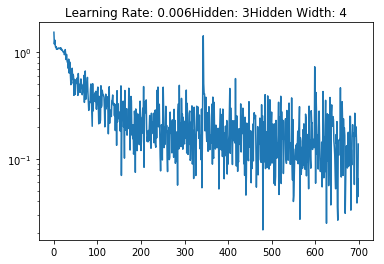

In [34]:
#- number of hidden layers
#- width of hidden layers
#- dropout probability
#- learning rate

epochs = 700
smoothing_constant = .01

LR_sweep = [0.006] 
hidden_count = [2,3]
hidden_width_sweep = [3,4]
dropout_prob = 0.1

num_outputs = 3
final_loss = []
for LR in LR_sweep:
    for num_hidden in hidden_count:
        for hidden_width in hidden_width_sweep:
    
            #Create Net
            net = build_net(num_hidden, num_outputs, hidden_width, dropout_prob)

            #--Parameter Initilization
            net.collect_params().initialize(mx.init.Xavier(magnitude = 2.24),ctx = data_ctx)

            #--Optimizer
            trainer = gluon.Trainer(net.collect_params(), 'ADAM', {'learning_rate': LR})

            #--Execute Training

            loss_list=[]
            train_acc = []
            for e in range(epochs):
                for i, (data, label) in enumerate(train_data):
                    data = data.as_in_context(data_ctx).reshape((-1, 4))
                    label = label.as_in_context(data_ctx)

                    with autograd.record():
                        output = net(data)
                        loss = softmax_cross_entropy(output, label)
                        loss.backward()
                    trainer.step(data.shape[0])

                    ##########################
                    #  Keep a moving average of the losses
                    ##########################
                    curr_loss = nd.mean(loss).asscalar()
                    moving_loss = (curr_loss if ((i == 0) and (e == 0))
                                   else (1 - smoothing_constant) * moving_loss + (smoothing_constant) * curr_loss)

                #test_accuracy = evaluate_accuracy(test_data, net)
                train_accuracy = evaluate_accuracy(train_data, net)
                loss_list.append(curr_loss)
                train_acc.append(train_accuracy)
                print("Epoch %s. Loss: %s, Train_acc %s" %
                      (e, curr_loss, train_accuracy))

            plt.plot(range(len(loss_list)),loss_list)
            plt.yscale('log')
            plt.title('Learning Rate: ' + str(LR) + 
                       'Hidden: '+ str(num_hidden) +
                      'Hidden Width: ' + str(hidden_width))
            plt.show()

            final_loss.append((LR,num_hidden,hidden_width,curr_loss,train_accuracy))

In [35]:
final_loss

[(0.006, 2, 3, 0.054944053, 0.98),
 (0.006, 2, 4, 0.0542284, 0.9866666666666667),
 (0.006, 3, 3, 0.36673704, 0.98),
 (0.006, 3, 4, 0.13756913, 0.98)]